In [7]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Chỉnh sửa nguồn output ở đây
EXP_DIR = Path(r"D:\24022440\ML\Resnet 50\outputs\exp_001")

df = pd.read_csv(EXP_DIR / "metrics.csv")
df.head()


,epoch,lr,train_loss,train_top1,train_top5,val_loss,val_top1,val_top5
0,1,0.010,5.606303,0.480769,2.804487,5.304162,1.174497,5.536913
1,2,0.010,5.166755,1.151843,5.498798,5.056117,1.733781,6.655481
2,3,0.010,5.018769,1.772837,8.042869,6.417161,2.125280,8.780761
3,4,0.010,4.884751,2.193510,10.296474,4.746006,3.076063,12.919463
4,5,0.001,4.759892,2.694311,11.848958,4.623694,3.859060,13.646532


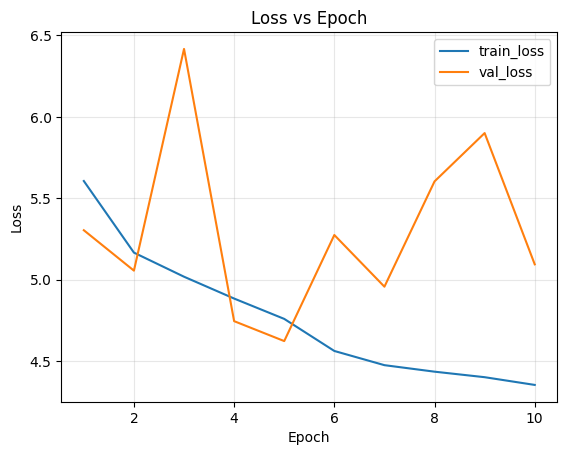

WindowsPath('D:/24022440/ML/Resnet 50/outputs/exp_001/loss_curve.png')

In [8]:
plt.figure()
plt.plot(df["epoch"], df["train_loss"], label="train_loss")
plt.plot(df["epoch"], df["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()
plt.grid(True, alpha=0.3)

out_path = EXP_DIR / "loss_curve.png"
plt.savefig(out_path, dpi=200, bbox_inches="tight")
plt.show()

out_path


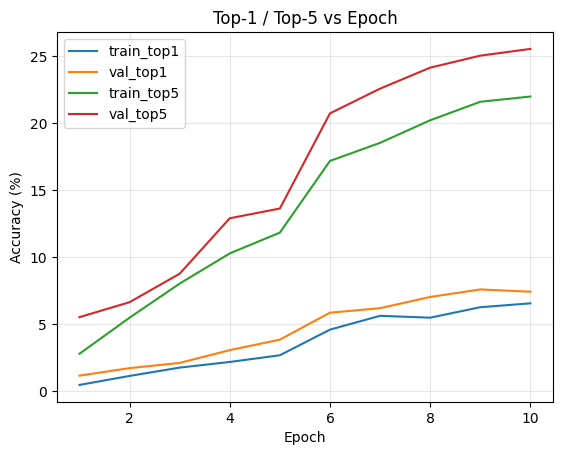

WindowsPath('D:/24022440/ML/Resnet 50/outputs/exp_001/acc_curve.png')

In [9]:
plt.figure()
plt.plot(df["epoch"], df["train_top1"], label="train_top1")
plt.plot(df["epoch"], df["val_top1"], label="val_top1")
plt.plot(df["epoch"], df["train_top5"], label="train_top5")
plt.plot(df["epoch"], df["val_top5"], label="val_top5")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Top-1 / Top-5 vs Epoch")
plt.legend()
plt.grid(True, alpha=0.3)

out_path = EXP_DIR / "acc_curve.png"
plt.savefig(out_path, dpi=200, bbox_inches="tight")
plt.show()

out_path


In [ ]:
from pathlib import Path
import pandas as pd

# Chỉnh sửa nguồn output ở đây
EXP_DIR = Path(r"D:\24022440\ML\Resnet 50\outputs\exp_001") 

csv_path = EXP_DIR / "metrics.csv"
if not csv_path.exists():
    raise FileNotFoundError(f"file not found: {csv_path}")

df = pd.read_csv(csv_path)
df.columns = [c.strip() for c in df.columns] 

sort_cols = ["val_top1", "val_top5"]
ascending = [False, False]
if "val_loss" in df.columns:
    sort_cols.append("val_loss")
    ascending.append(True)

best_row = df.sort_values(sort_cols, ascending=ascending).iloc[0]
last_row = df.sort_values("epoch").iloc[-1]

cols_prefer = ["epoch", "lr", "train_loss", "val_loss", "train_top1", "val_top1", "train_top5", "val_top5"]
cols = [c for c in cols_prefer if c in df.columns]

summary = pd.DataFrame(
    [best_row[cols].to_dict(), last_row[cols].to_dict()],
    index=["BEST (theo val_top1)", "LAST (epoch cuối)"]
)

def fmt(col, x):
    if col == "epoch":
        return int(x)
    if col == "lr":
        return f"{float(x):.6f}"
    if "loss" in col:
        return f"{float(x):.4f}"
    return f"{float(x):.2f}"

for c in summary.columns:
    summary[c] = summary[c].apply(lambda x, col=c: fmt(col, x))

summary


,epoch,lr,train_loss,val_loss,train_top1,val_top1,train_top5,val_top5
BEST (theo val_top1),9,0.001000,4.4020,5.9005,6.28,7.61,21.61,25.06
LAST (epoch cuối),10,0.000100,4.3546,5.0948,6.57,7.44,22.01,25.56
